<a href="https://colab.research.google.com/github/Vmalik1995/Factor-Analysis/blob/main/Supply_Demand_Factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install plotly opendatasets  seaborn --quiet --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 67.5 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import opendatasets as od

In [5]:
demand_url = 'https://www.kaggle.com/datasets/utkarshx27/factors-influence-house-price-in-us?select=demand.csv'

In [6]:
supply_url = 'https://www.kaggle.com/datasets/utkarshx27/factors-influence-house-price-in-us?select=supply.csv'

In [7]:
od.download(demand_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vaibhavmalik2795
Your Kaggle Key: ··········


100%|██████████| 3.91k/3.91k [00:00<00:00, 7.06MB/s]

In [8]:
!ls -lh factors-influence-house-price-in-us

total 16K
-rw-r--r-- 1 root root 5.3K Jun  6 09:28 demand.csv
-rw-r--r-- 1 root root 4.7K Jun  6 09:28 supply.csv


In [9]:
demand_df = pd.read_csv('factors-influence-house-price-in-us/demand.csv')

In [10]:
demand_df

,DATE,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
0,01-01-2003,129.321000,5.840769,79.966667,2.250000,186000,11174.129
1,01-04-2003,131.756000,5.506923,89.266667,2.166667,191800,11312.766
2,01-07-2003,135.013000,6.033846,89.300000,2.000000,191900,11566.669
3,01-10-2003,138.835667,5.919286,91.966667,2.000000,198800,11772.234
4,01-01-2004,143.298667,5.597500,98.000000,2.000000,212700,11923.447
...,...,...,...,...,...,...,...
76,01-01-2022,290.868000,3.822308,63.133333,NaN,433100,24740.480
77,01-04-2022,303.422667,5.266154,57.866667,NaN,449300,25248.476
78,01-07-2022,301.726333,5.623077,56.100000,NaN,468000,25723.941
79,01-10-2022,297.896667,6.664615,58.800000,NaN,479500,26137.992


In [11]:
demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           81 non-null     object 
 1   CSUSHPISA      80 non-null     float64
 2   MORTGAGE30US   81 non-null     float64
 3   UMCSENT        81 non-null     float64
 4   INTDSRUSM193N  74 non-null     float64
 5   MSPUS          81 non-null     int64  
 6   GDP            81 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 4.6+ KB


In [12]:
demand_df.describe()

,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
count,80.000000,81.000000,81.000000,74.000000,81.000000,81.000000
mean,180.658712,4.705420,82.149794,1.961712,281104.938272,17298.487852
std,41.410501,1.114588,12.408088,1.732885,68121.518078,3851.890323
min,129.321000,2.760714,56.100000,0.250000,186000.000000,11174.129000
25%,148.204500,3.822308,73.866667,0.750000,228100.000000,14448.882000
50%,172.270000,4.440000,82.966667,1.041667,258400.000000,16629.050000
75%,196.770917,5.768462,93.066667,2.562500,318400.000000,19894.750000
max,303.422667,6.664615,98.933333,6.250000,479500.000000,26465.865000


In [13]:
px.bar(demand_df,
       x= 'DATE',
       y='CSUSHPISA',
       title = 'Quarterly House Prices since 1 JAN 2003 for last 20 years')

In [14]:
demand_df.DATE = pd.to_datetime(demand_df.DATE)
demand_df['Date']= demand_df['DATE'].dt.strftime('%d-%m-%Y')

In [15]:
demand_df.Date = pd.to_datetime(demand_df.Date)

In [16]:
demand_df['Month'] = demand_df['Date'].dt.month

In [17]:
demand_df['Day']= demand_df['Date'].dt.day

In [18]:
new_df = demand_df.drop(['DATE'], axis = 1)

In [19]:
new_df

,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP,Date,Month,Day
0,129.321000,5.840769,79.966667,2.250000,186000,11174.129,2003-01-01,1,1
1,131.756000,5.506923,89.266667,2.166667,191800,11312.766,2003-04-01,4,1
2,135.013000,6.033846,89.300000,2.000000,191900,11566.669,2003-07-01,7,1
3,138.835667,5.919286,91.966667,2.000000,198800,11772.234,2003-10-01,10,1
4,143.298667,5.597500,98.000000,2.000000,212700,11923.447,2004-01-01,1,1
...,...,...,...,...,...,...,...,...,...
76,290.868000,3.822308,63.133333,NaN,433100,24740.480,2022-01-01,1,1
77,303.422667,5.266154,57.866667,NaN,449300,25248.476,2022-04-01,4,1
78,301.726333,5.623077,56.100000,NaN,468000,25723.941,2022-07-01,7,1
79,297.896667,6.664615,58.800000,NaN,479500,26137.992,2022-10-01,10,1


# Demand factors and their relationship with House prices(index and median )

In [71]:
px.scatter(new_df,
               x='Date',
               y='CSUSHPISA',
           title='House Price(index) wrt date')

In [21]:
correlation = new_df.corr()

<ipython-input-21-542b62a7273d>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

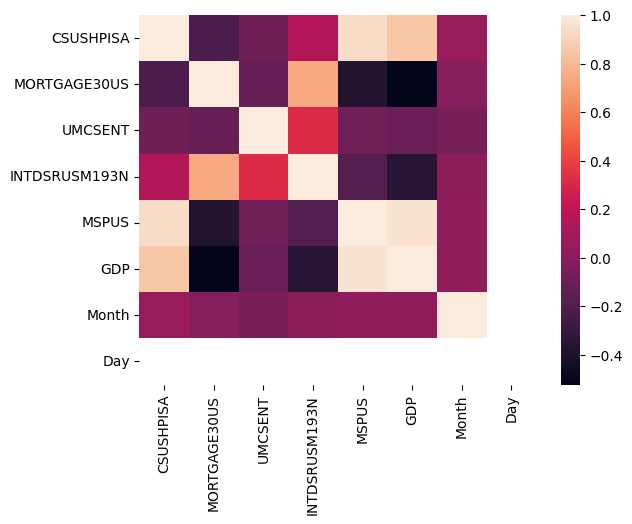

In [22]:
sns.heatmap(correlation)

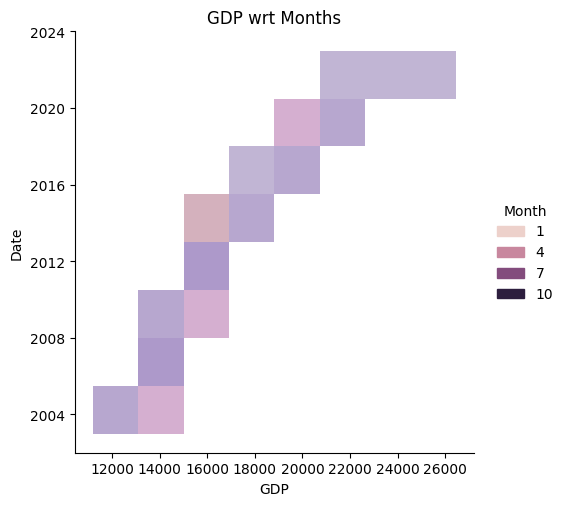

In [58]:

sns.displot(data=new_df,
            x='GDP',
            y='Date',
            hue= 'Month').set(title='GDP wrt Months');

In [51]:
px.bar(new_df,
       x='Date',
       y='MSPUS',
       title = 'Median Prices recored with time')

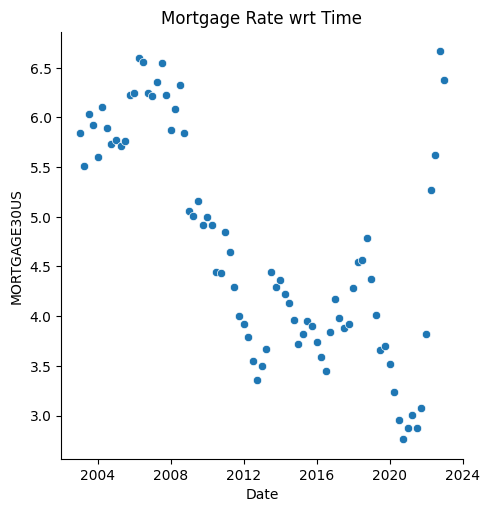

In [57]:
sns.relplot(data = new_df,
            x='Date',
            y='MORTGAGE30US').set(title = 'Mortgage Rate wrt Time')

In [52]:
px.line(new_df,
        x='Date',
        y=['GDP','MORTGAGE30US'],
        title='GDP vs Mortgage Rate for the last 20 years')

In [53]:
px.line(new_df,
        x='Date',
        y=['GDP','MSPUS'],
        title='GDP vs Median Sale Prices of Properties')

In [54]:
px.bar(new_df,
       x='Date',
       y='UMCSENT',
       title='US Customers Sentiment Ratings conducted by University of Michigan')

In [55]:
px.line(new_df,
        x='Date',
        y=['UMCSENT','MSPUS'],
        title='US House prices vs Sentiment Score')

In [63]:
px.scatter(new_df,
           x='CSUSHPISA',
           y='MSPUS', color='Month',
           title='Median Prices vs House Price Index')

In [59]:
px.line(new_df,
        x='Date',
        y=['INTDSRUSM193N','MSPUS'],
        title='Comparing the Interest rates and the Median Prices')

In [60]:
px.line(new_df,
        x='Date',
        y=['INTDSRUSM193N','GDP'],
        title='GDP vs Interest Rates')

In [61]:
px.line(new_df,
        x='Date',
        y=['GDP','CSUSHPISA'],
        title='GDP VS House Price Index')

# Supply Factors and their effects on House Prices in Last 20 Years

In [64]:
supply_df = pd.read_csv('factors-influence-house-price-in-us/supply.csv')

In [65]:
supply_df

,DATE,CSUSHPISA,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N
0,01-01-2003,129.321,4.2,1806.333333,421328.6667,14908
1,01-04-2003,131.756,3.833333333,1837.666667,429308.6667,15244
2,01-07-2003,135.013,3.633333333,1937.333333,458890,15614
3,01-10-2003,138.8356667,3.966666667,1972.333333,491437.3333,15654
4,01-01-2004,143.2986667,3.7,1994.666667,506856.3333,15895
...,...,...,...,...,...,...
77,01-04-2022,303.4226667,8.7,1734.666667,947300.3333,15286
78,01-07-2022,301.7263333,9.566666667,1610.666667,910346,15306
79,01-10-2022,297.8966667,9.2,1455.333333,870620.6667,14554
80,01-01-2023,.,8.033333333,1424.333333,842559.6667,15053


In [66]:
supply_df.DATE = pd.to_datetime(supply_df.DATE)
supply_df['Date']= supply_df['DATE'].dt.strftime('%d-%m-%Y')

In [67]:
supply_df.Date = pd.to_datetime(supply_df.Date)
supply_df['Month'] = supply_df['Date'].dt.month

In [68]:
supply_df['Day']= supply_df['Date'].dt.day

In [69]:
new_df2= supply_df.drop(['DATE'], axis = 1)

In [70]:
new_df2

,CSUSHPISA,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,Date,Month,Day
0,129.321,4.2,1806.333333,421328.6667,14908,2003-01-01,1,1
1,131.756,3.833333333,1837.666667,429308.6667,15244,2003-04-01,4,1
2,135.013,3.633333333,1937.333333,458890,15614,2003-07-01,7,1
3,138.8356667,3.966666667,1972.333333,491437.3333,15654,2003-10-01,10,1
4,143.2986667,3.7,1994.666667,506856.3333,15895,2004-01-01,1,1
...,...,...,...,...,...,...,...,...
77,303.4226667,8.7,1734.666667,947300.3333,15286,2022-04-01,4,1
78,301.7263333,9.566666667,1610.666667,910346,15306,2022-07-01,7,1
79,297.8966667,9.2,1455.333333,870620.6667,14554,2022-10-01,10,1
80,.,8.033333333,1424.333333,842559.6667,15053,2023-01-01,1,1


In [76]:
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CSUSHPISA       82 non-null     object        
 1   MSACSR          82 non-null     object        
 2   PERMIT          82 non-null     object        
 3   TLRESCONS       82 non-null     object        
 4   EVACANTUSQ176N  82 non-null     object        
 5   Date            82 non-null     datetime64[ns]
 6   Month           82 non-null     int64         
 7   Day             82 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 5.2+ KB


In [86]:
n=2

In [87]:
new_df2.drop(new_df2.tail(n).index, inplace = True)

In [88]:
convert_dict = {'CSUSHPISA':float,
                'MSACSR': float,
                'PERMIT': float,
                'TLRESCONS': float,
                'EVACANTUSQ176N': int
                }

In [89]:
new_df2 = new_df2.astype(convert_dict)

In [90]:
relation = new_df2.corr()

<ipython-input-90-89c7171fc2c9>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

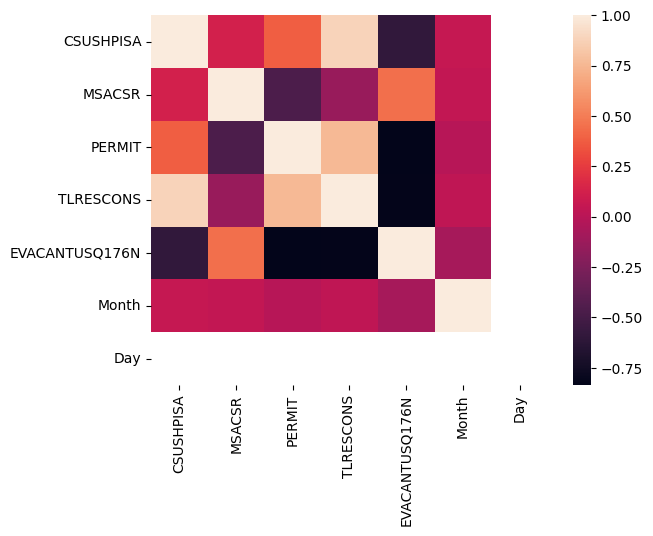

In [91]:
sns.heatmap(relation)

In [93]:
px.bar(new_df2,
       x='Date',
       y='PERMIT',
       title='Permits issued in last 20 years')

In [95]:
px.scatter(new_df2,
               x='Date',
               y='MSACSR',
               title='Monthly Supply of New Houses')

In [96]:
px.line(new_df2,
        x='Date',
        y=['MSACSR','PERMIT'],
        title='Monthly supply vs Permits')

In [99]:
px.line(new_df2,
          x='Date',
          y='TLRESCONS',
          title='Spending on construction')

In [105]:
px.bar(new_df2,
            x='Date',
            y='EVACANTUSQ176N',
       title='Housing Inventory supplies for the last 20 years')